In [1]:
import glob
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

from invisible_cities.io.pmaps_io import load_pmaps_as_df

to_df = pd.DataFrame.from_records

In [2]:
dtype = "pmaps"
run_number = 7255

icversion_datadir  = f"/Users/gonzalo/Documents/NEXT/ireneProblem/DATA/{run_number}/v0.9.9/"
testprod_datadir   = f"/Users/gonzalo/Documents/NEXT/ireneProblem/DATA/{run_number}/IC-testprod/"
testprod_p_datadir = f"/Users/gonzalo/Documents/NEXT/ireneProblem/DATA/{run_number}/IC-testprod-p/"

icversion_files  = glob.glob(icversion_datadir  + f"*")
testprod_files   = glob.glob(testprod_datadir   + f"*")
testprod_p_files = glob.glob(testprod_p_datadir + f"*")

icversion_files .sort()
testprod_files  .sort()
testprod_p_files.sort()

EV number: 162
MACT: 1


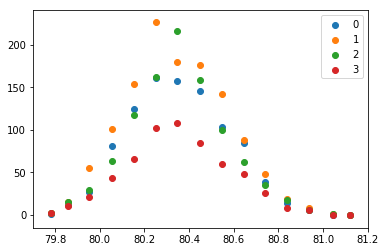

In [3]:
#icversion
S1, S2, S2Si, S1PMT, S2PMT =load_pmaps_as_df(icversion_files[0])

events = np.unique(S2["event"])

i = int(np.random.random()*len(events))

ev = events[i]

print("EV number:", ev)

S2_ev    = S2   [S2["event"]==ev]
S2PMT_ev = S2PMT[S2PMT["event"]==ev]

times = S2_ev["time"].values/10e3

pmts = np.unique(S2PMT_ev["npmt"])[:4]

esum = []
for pmt in pmts:
    enes = S2PMT_ev[S2PMT_ev["npmt"]==pmt]["ene"]
    esum.append( np.sum(enes[enes>0]) )
    plt.scatter(times, S2PMT_ev[S2PMT_ev["npmt"]==pmt]["ene"], label = f"{pmt}")
plt.legend()

print("MACT:", pmts[np.argmax(esum)])

EV number: 133
MACT: 1


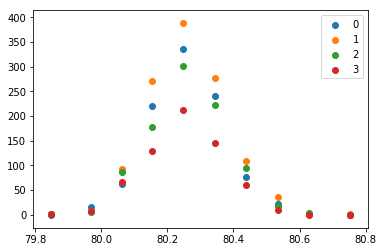

In [4]:
#testprod
S1, S2, S2Si, S1PMT, S2PMT =load_pmaps_as_df(testprod_p_files[0])

events = np.unique(S2["event"])
ev = events[i]

print("EV number:", ev)

S2_ev    = S2   [S2["event"]==ev]
S2PMT_ev = S2PMT[S2PMT["event"]==ev]

times = S2_ev["time"].values/10e3

pmts = np.unique(S2PMT_ev["npmt"])[:4]

esum = []
for pmt in pmts:
    enes = S2PMT_ev[S2PMT_ev["npmt"]==pmt]["ene"]
    esum.append( np.sum(enes[enes>0]) )
    
    plt.scatter(times, S2PMT_ev[S2PMT_ev["npmt"]==pmt]["ene"], label = f"{pmt}")
plt.legend()

print("MACT:", pmts[np.argmax(esum)])

In [22]:
## energy spectra trigger2
import glob
datadir = "/Users/gonzalo/Documents/NEXT/ireneProblem/DATA/7255/v0.9.9/"
files   = glob.glob(datadir+"*")
files.sort()

In [24]:
len(files)

957

In [25]:
E = []

for file in files:
    _, S2, _, _, _ = load_pmaps_as_df(file)
    
    events = np.unique(S2["event"])
    for ev in events:
        S2_ev = S2[S2["event"]==ev]
        
        peaks = np.unique(S2_ev["peak"])
        
        for pk in peaks:
            S2_ev_pk = S2_ev[S2["peak"]==pk]
            
            E. append( np.sum(S2_ev_pk["ene"]) )
            

/Users/gonzalo/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
from histogram_functions import *

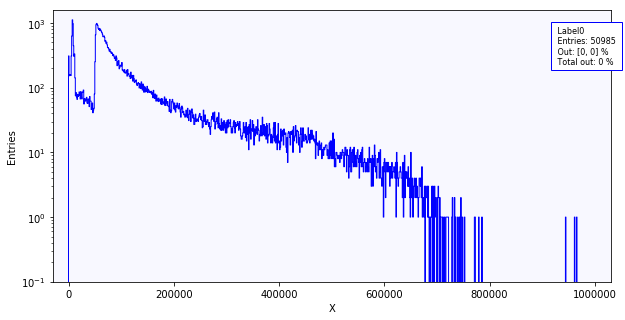

In [59]:
histo1D(np.array(E), 
        bins= 1000,
        scale="log",
        xlims=[None, 1e6])